In [1]:
# Exploratory Data Analysis (EDA):	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('Titanic_train.csv') #importing the dataset
df.info() #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape # this gives the size of the dataset

(891, 12)

In [7]:
df.dtypes  # this gives the type of the features present in the dataset.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.isnull().sum() # checks for issing or null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# this gives the numerical columns in the dataset , from this we need to drop passenger id : beacuse it is just an identifier and is of no use to make predictions.
numerical_col=df.select_dtypes(include=["number"]).columns
numerical_col  

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
 # this gives the categorical columns in the dataset , from this we will be dropping name,ticket because of high cardinality and they are identifier so they do not affect the predictions. cabin has to be dropped because of more no of outliers.
categorical_col=df.select_dtypes(include=["object"]).columns
categorical_col 

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
df.describe() # gives the sumary statistics of the features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df_cleaned=df.copy()

In [19]:
df_cleaned.columns[df_cleaned.columns.duplicated()] # to check duplicated coluns

Index([], dtype='object')

In [21]:
# converting these columns to floats to avoid error while assigning upper extreme and lower extreme value at the time of handling errors, as these columns are int type initially.
df_cleaned['SibSp']=df_cleaned['SibSp'].astype(float)
df_cleaned['Parch']=df_cleaned['Parch'].astype(float)

In [23]:
df_cleaned.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
df_cleaned=df_cleaned.loc[:, ~df_cleaned.columns.isin(['PassengerId','Name', 'Ticket', 'Cabin'])] # isin checks whether the columns are in the dataset and drops them if true
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0.0,7.2500,S
1,1,1,female,38.0,1.0,0.0,71.2833,C
2,1,3,female,26.0,0.0,0.0,7.9250,S
3,1,1,female,35.0,1.0,0.0,53.1000,S
4,0,3,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0.0,13.0000,S
887,1,1,female,19.0,0.0,0.0,30.0000,S
888,0,3,female,NaN,1.0,2.0,23.4500,S
889,1,1,male,26.0,0.0,0.0,30.0000,C


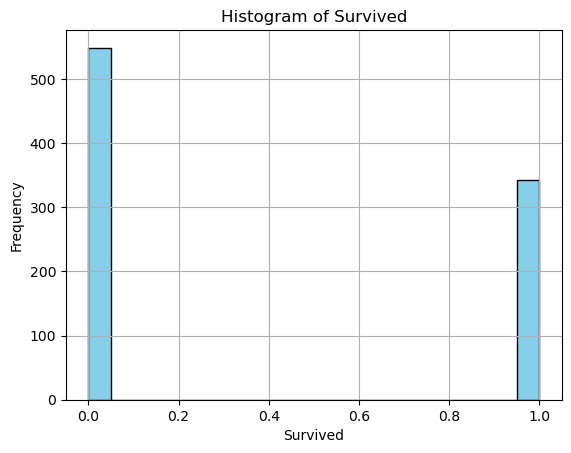

Skewness: 0.48
negatively skewed


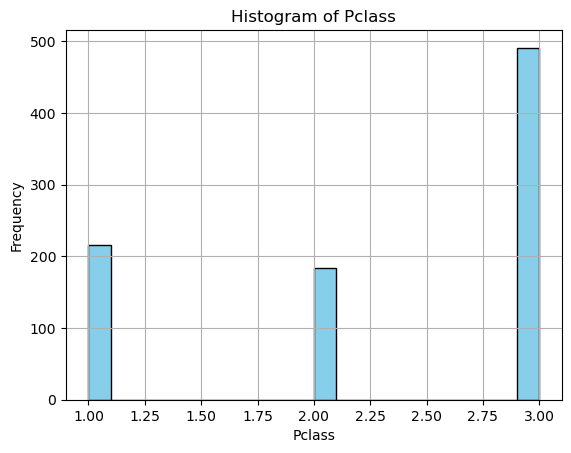

Skewness: -0.63
negatively skewed


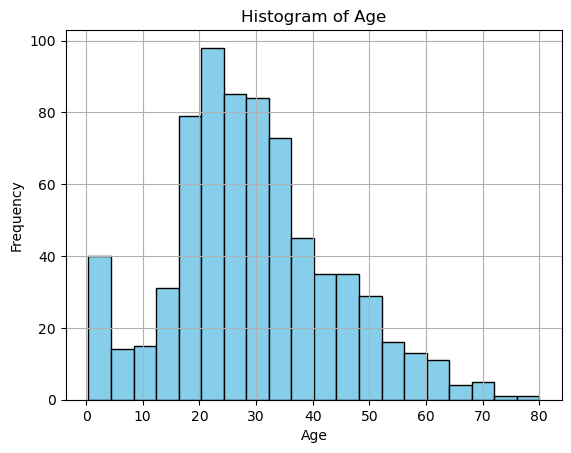

Skewness: nan
negatively skewed


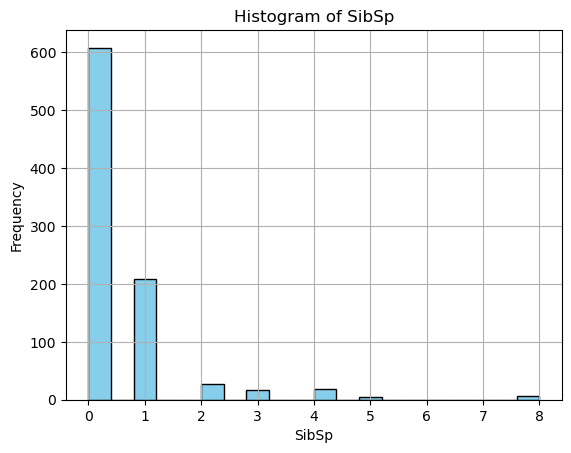

Skewness: 3.69
positively skewed


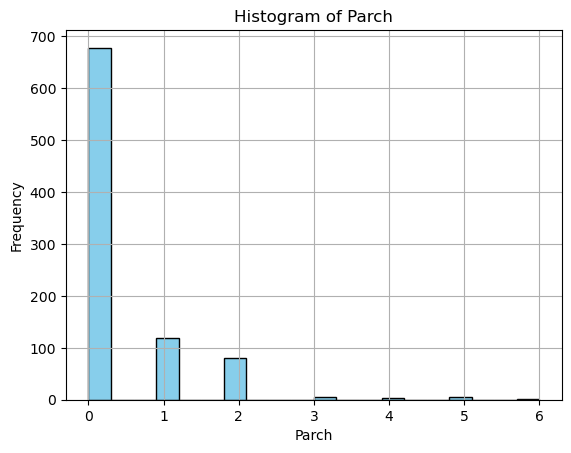

Skewness: 2.74
positively skewed


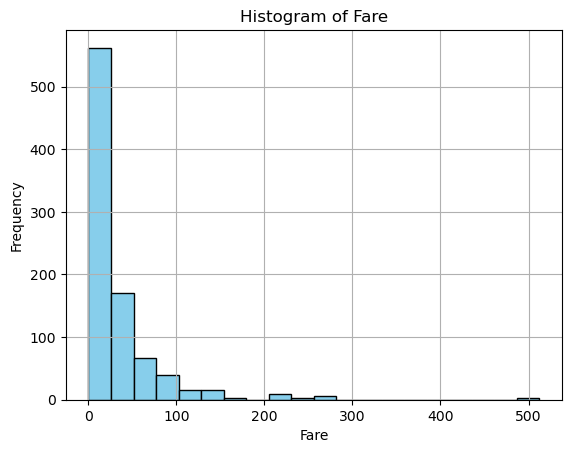

Skewness: 4.78
positively skewed


In [27]:
# visualizations histograms
num_col=df_cleaned.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df_cleaned[col]) #calculating skewness of each histogram
    
    df_cleaned[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

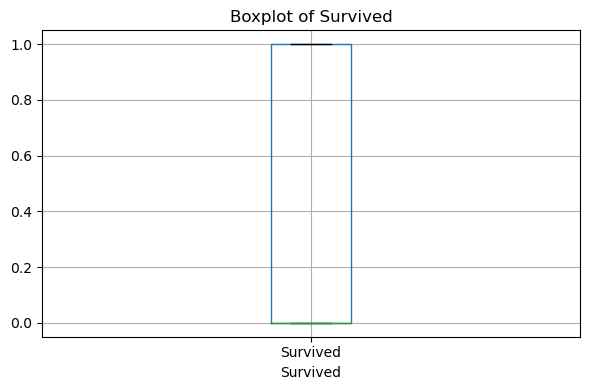

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


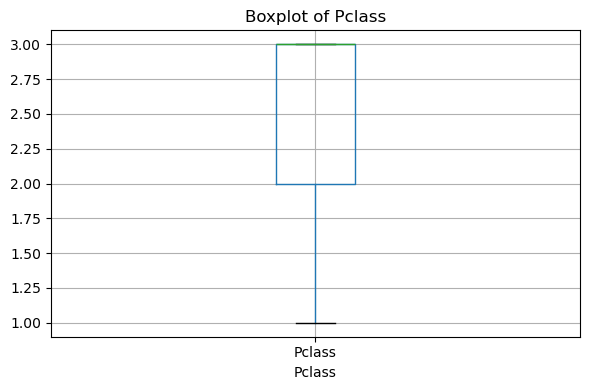

Outliers detected: 0
Lower extreme: 0.5
Upper extreme: 4.5


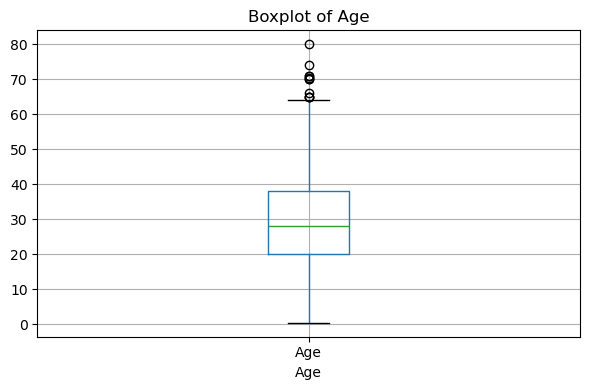

Outliers detected: 11
Lower extreme: -6.6875
Upper extreme: 64.8125


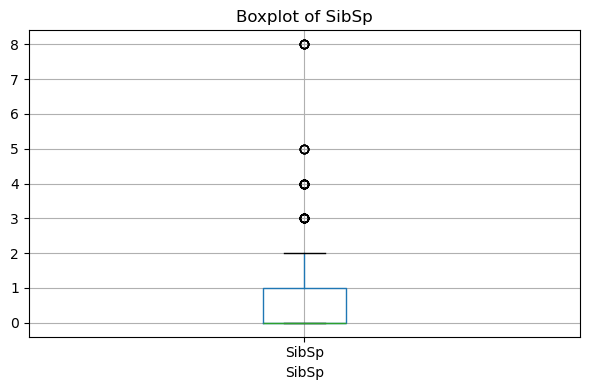

Outliers detected: 46
Lower extreme: -1.5
Upper extreme: 2.5


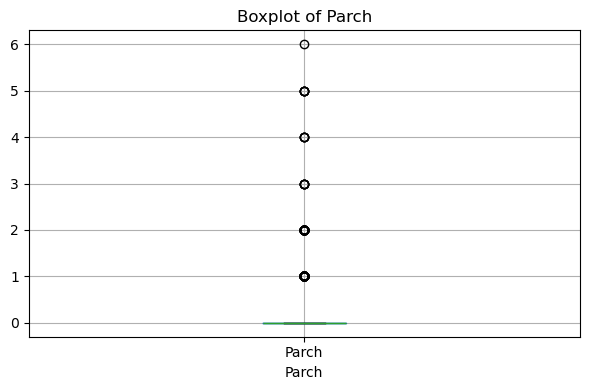

Outliers detected: 213
Lower extreme: 0.0
Upper extreme: 0.0


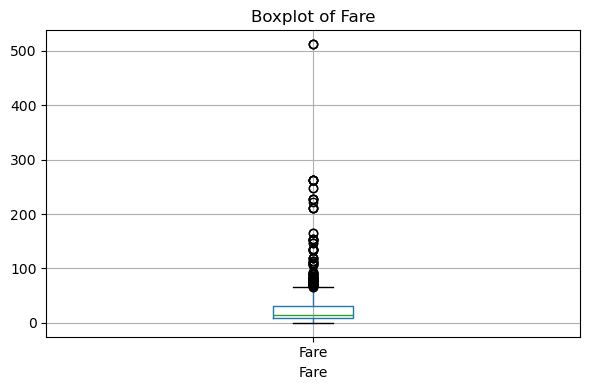

Outliers detected: 116
Lower extreme: -26.724
Upper extreme: 65.6344


In [28]:
# boxplots
for col in num_col:
    series = df_cleaned[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

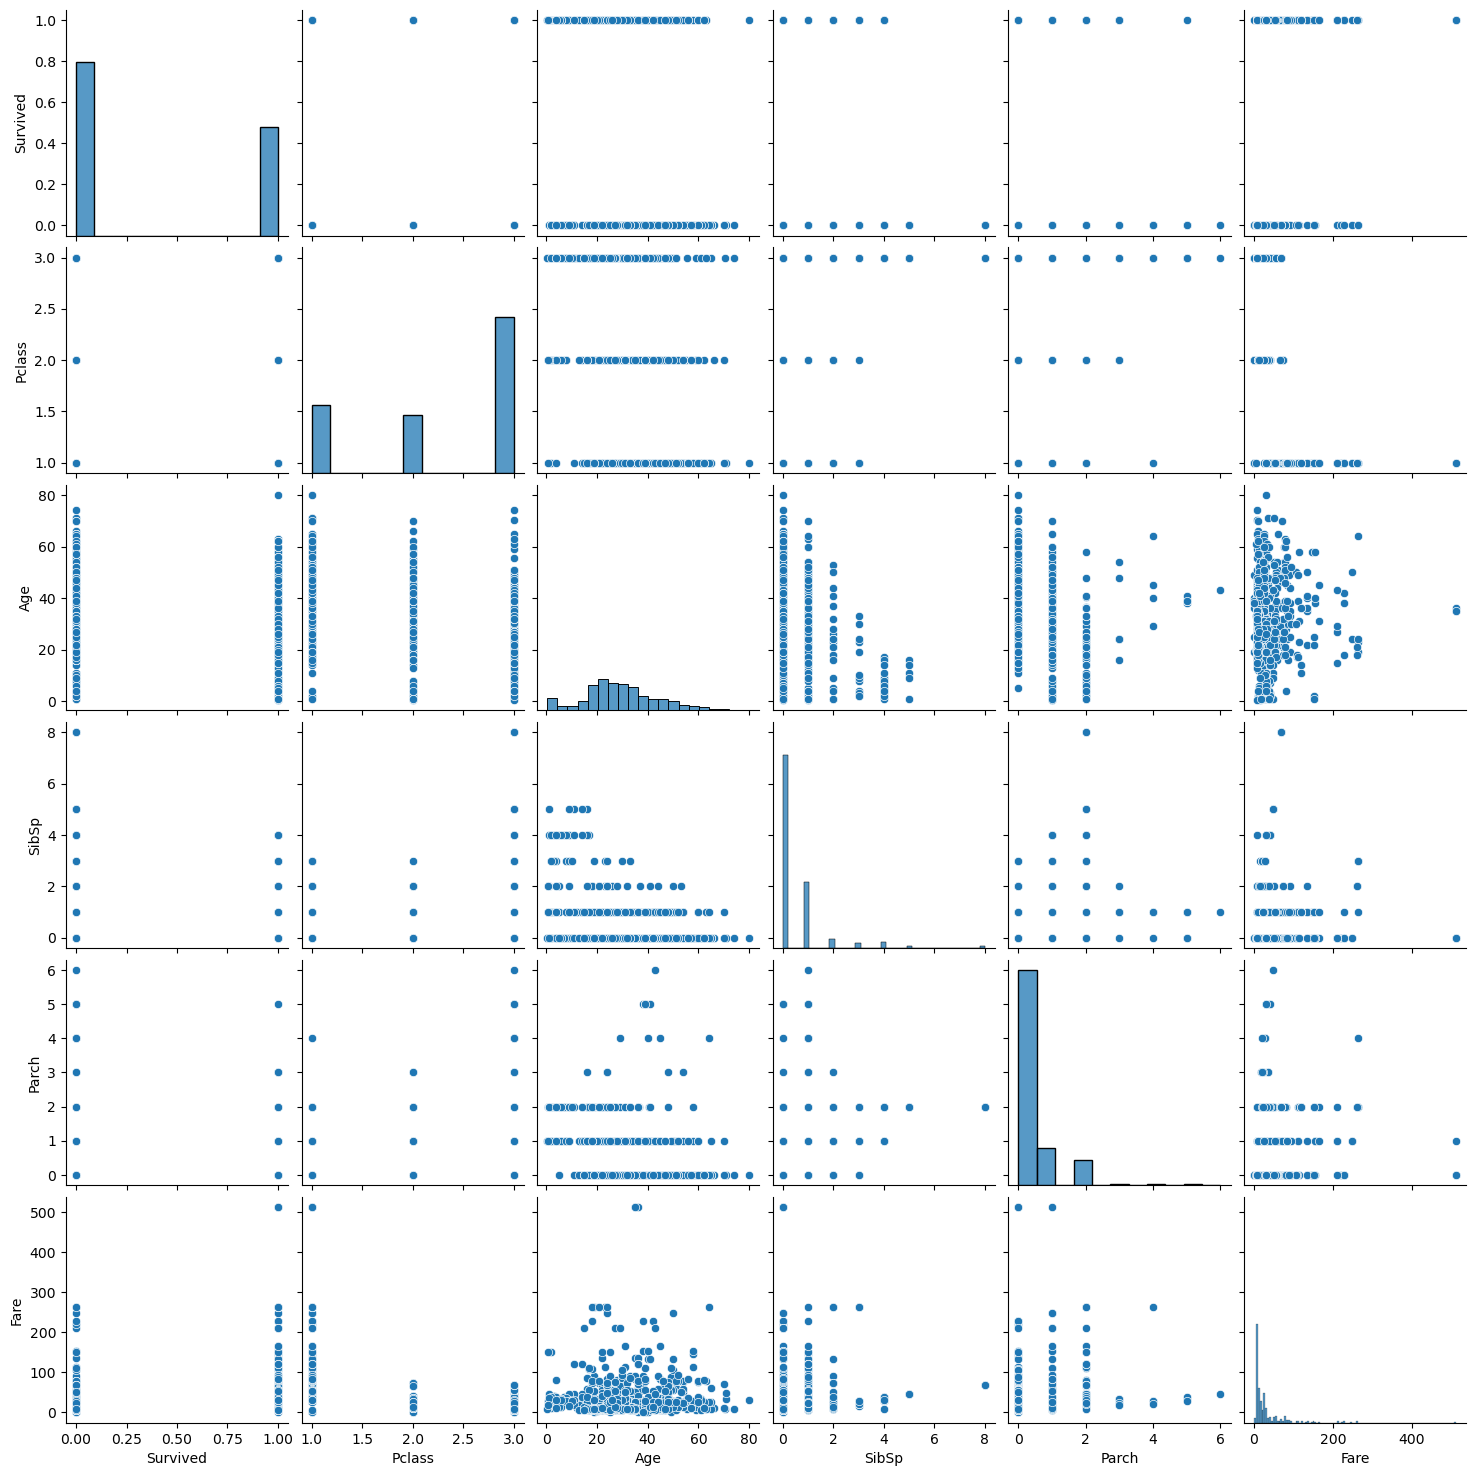

In [29]:
sns.pairplot(df_cleaned)

In [30]:
# Data Preprocessing:
#imputing the missing values
df_cleaned['Age']=df_cleaned['Age'].fillna(df_cleaned['Age'].mean())

In [31]:
df_cleaned=df_cleaned.dropna() #there are only 2 missing values in embarked thus dropping them
df_cleaned.reset_index(drop=True) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1.0,0.0,7.2500,S
1,1,1,female,38.000000,1.0,0.0,71.2833,C
2,1,3,female,26.000000,0.0,0.0,7.9250,S
3,1,1,female,35.000000,1.0,0.0,53.1000,S
4,0,3,male,35.000000,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.000000,0.0,0.0,13.0000,S
885,1,1,female,19.000000,0.0,0.0,30.0000,S
886,0,3,female,29.699118,1.0,2.0,23.4500,S
887,1,1,male,26.000000,0.0,0.0,30.0000,C


In [33]:
df_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
# encoding categorical variables
# encoding categorical variables
cat_col=df_cleaned.select_dtypes(include=["object"]).columns # selecting only categorical columns
# Applying one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_col).astype(int)

# displaying the transformed dataset
df_cleaned.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


In [36]:
# handling outliers
# handling outliers
# IQR method to cap outliers 
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_cols:
    
    Q1 = df_cleaned.loc[:,col].quantile(0.25)
    Q3 = df_cleaned.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    df_cleaned.loc[df_cleaned.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    df_cleaned.loc[df_cleaned.loc[:,col] < lower_bound, col] = lower_bound
    
    

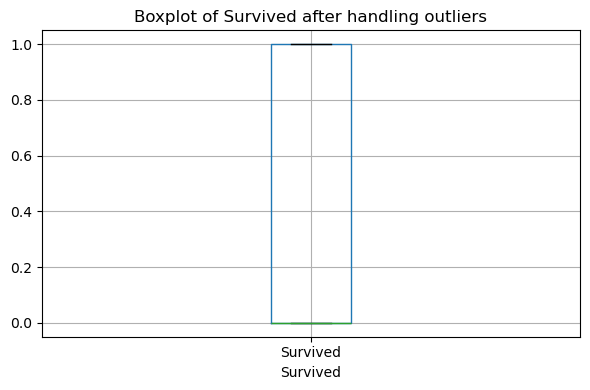

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


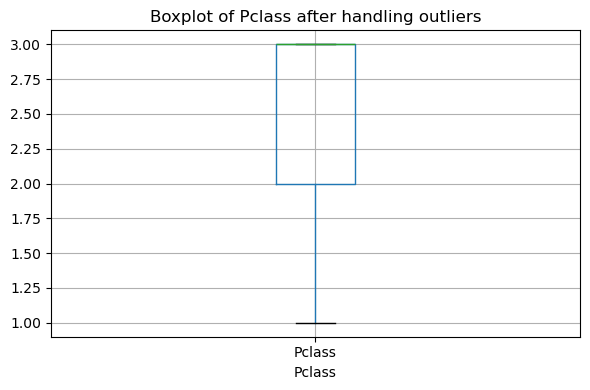

Outliers detected: 0
Lower extreme: 0.5
Upper extreme: 4.5


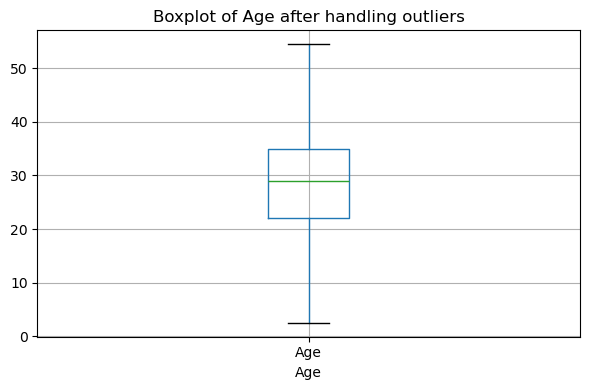

Outliers detected: 0
Lower extreme: 2.5
Upper extreme: 54.5


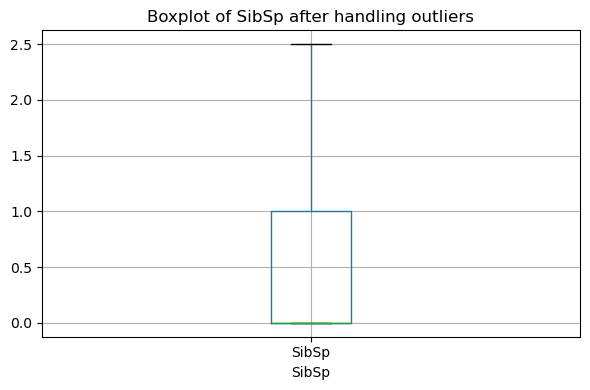

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


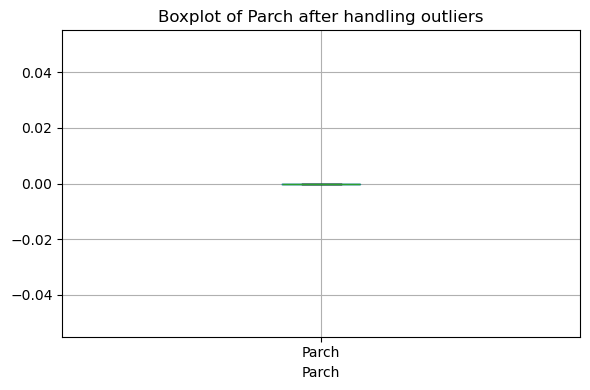

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


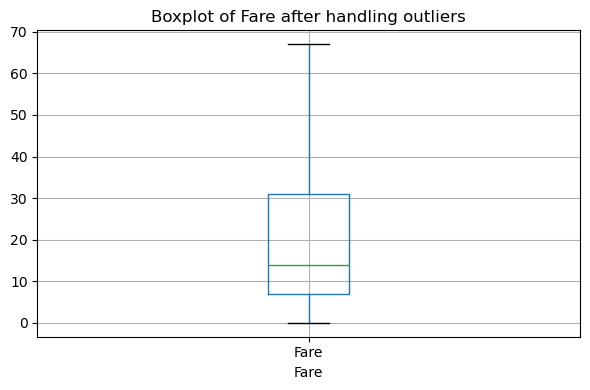

Outliers detected: 0
Lower extreme: -29.0
Upper extreme: 67.0


In [37]:
# plotting boxplots to check the presence of outliers after handling them.

for col in num_col:
    series = df_cleaned[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [38]:
# Building Predictive Models:
#Splitting the dataset into training and testing sets.
x=df_cleaned.drop('Survived',axis=1)
y=df_cleaned['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [39]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1.0,0,7,0,1,0,0,1
1,1,38.0,1.0,0,67,1,0,1,0,0
2,3,26.0,0.0,0,7,1,0,0,0,1
3,1,35.0,1.0,0,53,1,0,0,0,1
4,3,35.0,0.0,0,8,0,1,0,0,1


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [51]:
# lgbm
import lightgbm as lgb
model=lgb.LGBMClassifier(learning_rate=0.5,max_depth= 7,min_child_weight= 7,n_estimators= 90)
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 233, number of negative: 389
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 622, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374598 -> initscore=-0.512541
[LightGBM] [Info] Start training from score -0.512541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.5, max_depth=7, min_child_weight=7,
               n_estimators=90)

In [53]:
# evaluating on the test data
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       160
           1       0.80      0.70      0.75       107

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [78]:
# hyperparameter tuning
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro') 
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [80, 100, 120],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(lgb.LGBMClassifier(),params, scoring=scorer, cv=3, n_jobs=-1)
grid.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 233, number of negative: 389
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 622, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [80, 100, 120]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [79]:
grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100}

In [69]:
# deploying the model with best params provided by grid search
xmodel=lgb.LGBMClassifier(learning_rate=0.05,max_depth= 6,min_child_weight= 3,n_estimators= 100,class_weight='balanced')
xmodel.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 233, number of negative: 389
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 622, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=6,
               min_child_weight=3)

In [61]:
# evaluating on the test data
x_pred=xmodel.predict(x_test)
print(classification_report(y_test,x_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       160
           1       0.80      0.68      0.74       107

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



In [86]:
# xgbm
from xgboost import XGBClassifier

In [122]:
model2=XGBClassifier(learning_rate= 0.5, max_depth= 7, n_estimators= 100,class_weight='balanced')
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [124]:
# evaluating on test data
m2pred=model2.predict(x_test)
print(classification_report(y_test,m2pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       160
           1       0.78      0.69      0.73       107

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [116]:
# hyperparameter tuning
scorer = make_scorer(f1_score, pos_label=1)
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 150, 200],
    'scale_pos_weight': [1, 1.5]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param, cv=3, scoring=scorer)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [120]:
print(grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.7424837828369558


In [104]:
# deploying the model with best params provided by gridsearch
xmodel=XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100,class_weight='balanced')
xmodel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [106]:
# evaluating on test data
xpred=xmodel.predict(x_test)
print(classification_report(y_test,xpred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       160
           1       0.81      0.66      0.73       107

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [126]:
# Comparative Analysis:
lgb_accuracy=accuracy_score(y_test,x_pred)*100
lgb_precision=precision_score(y_test,x_pred)*100
lgb_recall=recall_score(y_test,x_pred)*100
lgb_f1score=f1_score(y_test,x_pred)*100

In [130]:
xgb_accuracy=accuracy_score(y_test,xpred)*100
xgb_precision=precision_score(y_test,xpred)*100
xgb_recall=recall_score(y_test,xpred)*100
xgb_f1score=f1_score(y_test,xpred)*100

In [132]:
metrics={
    'Metrics':['Accuracy','Precision','Recall','F1'],
    'LGBoost':[lgb_accuracy,lgb_precision,lgb_recall,lgb_f1score],
    'XGBoost':[xgb_accuracy,xgb_precision,xgb_recall,xgb_f1score]
}

In [134]:
metrics_df=pd.DataFrame(metrics)
metrics_df

,Metrics,LGBoost,XGBoost
0,Accuracy,80.524345,80.149813
1,Precision,80.219780,80.681818
2,Recall,68.224299,66.355140
3,F1,73.737374,72.820513


In [136]:
# from the above analysis lgboost is performing slightly better than xgboost

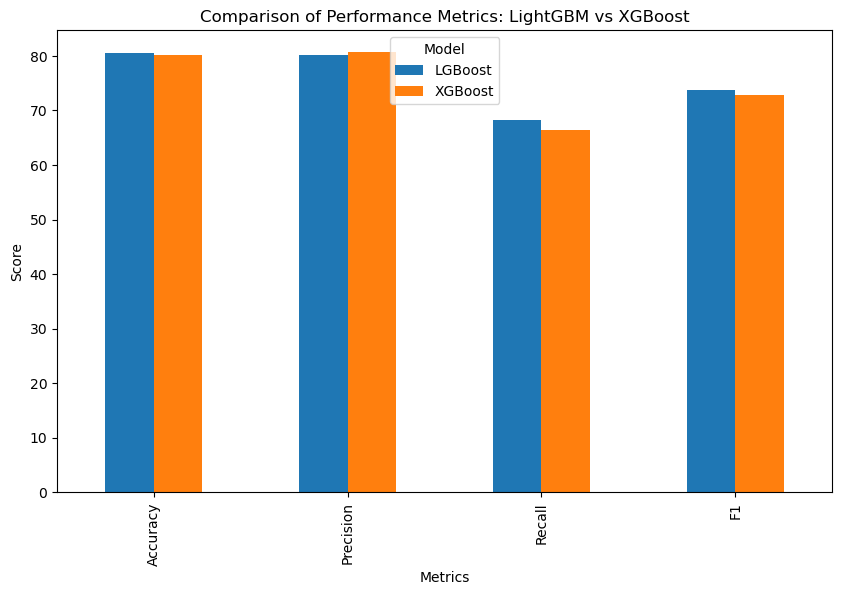

In [138]:
#Visualizations between LightGBM and XGBoost
metrics_df.plot(x='Metrics', kind='bar', figsize=(10, 6))
plt.title("Comparison of Performance Metrics: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()

In [ ]:
# Practical Implications:
#For projects where training speed and memory efficiency are critical, especially with large-scale data, LightGBM is often the preferred choice.
#When model interpretability and robustness are prioritized, or when dealing with smaller datasets, XGBoost remains the bet option.
